# Input/Output with HDF5

In [1]:
from trustutils import run

run.introduction("A. KHIZAR")
run.description("n this note, we check the use of the keyword 'single_hdf' which allows to generate and read files in HDF5 format")
run.TRUST_parameters()

## Introduction 
 Validation made by : A. KHIZAR



 Report generated 01/02/2022

### Description 
n this note, we check the use of the keyword 'single_hdf' which allows to generate and read files in HDF5 format

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt (built on TRUST /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build)

In [2]:
from trustutils import run  
run.reset()
c1 = run.addCase("Sauvegarde_hdf5","hdf5_io.data")  
c2 = run.addCase("Sauvegarde_simple_hdf5","hdf5_io.data")  
c3 = run.addCase("Logs_hdf5","hdf5_io.data") 
c4 = run.addCase("Zones_hdf5","hdf5_io.data",nbProcs=2)
run.printCases()
run.runCases(preventConcurrent=True)

### Test cases 
* Sauvegarde_hdf5/hdf5_io.data : 
* Sauvegarde_simple_hdf5/hdf5_io.data : 
* Logs_hdf5/hdf5_io.data : 
* Zones_hdf5/hdf5_io.data : 


Running ...
Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_Noparallel with 1 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = sauvegarde
feenableexcept enabled.
Data file : sauvegarde
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Sauvegarde_hdf5
Nom du cas sauvegarde
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (  ____ ) |\     /| (  ____ \ \__   __/  * 
 *     ) (    | (    )| | )   ( | | (    \/    ) (     *    
 *     | |    | (____)| | |   | | | (_____     | |     *     
 *     | |    |     __) | |   | | (_____  )    | |     *     
 *     | |    | (\ (    | |   | |       ) |    | |     *    
 *     | |    | ) \ \__ | (__

Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_Noparallel with 1 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = reprise
feenableexcept enabled.
Data file : reprise
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Sauvegarde_hdf5
Nom du cas reprise
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (  ____ ) |\     /| (  ____ \ \__   __/  * 
 *     ) (    | (    )| | )   ( | | (    \/    ) (     *    
 *     | |    | (____)| | |   | | | (_____     | |     *     
 *     | |    |     __) | |   | | (_____  )    | |     *     
 *     | |    | (\ (    | |   | |       ) |    | |     *    
 *     | |    | ) \ \__ | (___) | /\____) |    | |

Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_Noparallel with 1 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = resume_last_time
feenableexcept enabled.
Data file : resume_last_time
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Sauvegarde_hdf5
Nom du cas resume_last_time
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (  ____ ) |\     /| (  ____ \ \__   __/  * 
 *     ) (    | (    )| | )   ( | | (    \/    ) (     *    
 *     | |    | (____)| | |   | | | (_____     | |     *     
 *     | |    |     __) | |   | | (_____  )    | |     *     
 *     | |    | (\ (    | |   | |       ) |    | |     *    
 *     | |    | ) \ \__

Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_Noparallel with 1 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = sauvegarde
feenableexcept enabled.
Data file : sauvegarde
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Sauvegarde_simple_hdf5
Nom du cas sauvegarde
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (  ____ ) |\     /| (  ____ \ \__   __/  * 
 *     ) (    | (    )| | )   ( | | (    \/    ) (     *    
 *     | |    | (____)| | |   | | | (_____     | |     *     
 *     | |    |     __) | |   | | (_____  )    | |     *     
 *     | |    | (\ (    | |   | |       ) |    | |     *    
 *     | |    | ) \ \__ | (___) | 

Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_Noparallel with 1 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = reprise
feenableexcept enabled.
Data file : reprise
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Sauvegarde_simple_hdf5
Nom du cas reprise
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (  ____ ) |\     /| (  ____ \ \__   __/  * 
 *     ) (    | (    )| | )   ( | | (    \/    ) (     *    
 *     | |    | (____)| | |   | | | (_____     | |     *     
 *     | |    |     __) | |   | | (_____  )    | |     *     
 *     | |    | (\ (    | |   | |       ) |    | |     *    
 *     | |    | ) \ \__ | (___) | /\____) |

Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_Noparallel with 1 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = resume_last_time
feenableexcept enabled.
Data file : resume_last_time
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Sauvegarde_simple_hdf5
Nom du cas resume_last_time
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (  ____ ) |\     /| (  ____ \ \__   __/  * 
 *     ) (    | (    )| | )   ( | | (    \/    ) (     *    
 *     | |    | (____)| | |   | | | (_____     | |     *     
 *     | |    |     __) | |   | | (_____  )    | |     *     
 *     | |    | (\ (    | |   | |       ) |    | |     *    
 *     | |    | 

Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_journal_shared 2
Initialized MPI with MPI_COMM_WORLD (using all processors)
Petsc initialization succeeded.
Parallel engine initialized : Comm_Group_MPI with 2 processors
Executable: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
Data file name = PAR_journal_shared
Running in parallel with 2 processors
-journal_shared => all the processors are going to write in a unique journal file
feenableexcept enabled.
Data file : PAR_journal_shared
Localisation etude: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/hdf5_io/build/Logs_hdf5
Nom du cas PAR_journal_shared
 code : /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt
 version : 1.8.4 
 
 * * * * * * * * * * * * * * * * * * * * * * * * * * * *     
 *  _________  _______             _______  _________  *     
 *  \__   __/ (

Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_hdf5_io 2
  => A total of 4 cases were (successfully) run in 4.1s.


## Backup file in HDF5 format
We check that we can resume a calculation with an hdf5 backup file

###  Use of the keywords ’sauvegarde’ and ’reprise’

Comparison of channel flow rate between a full calculation and a resumed calculation. 

The results of the resumed calculation must overlapped those of the full calculation.

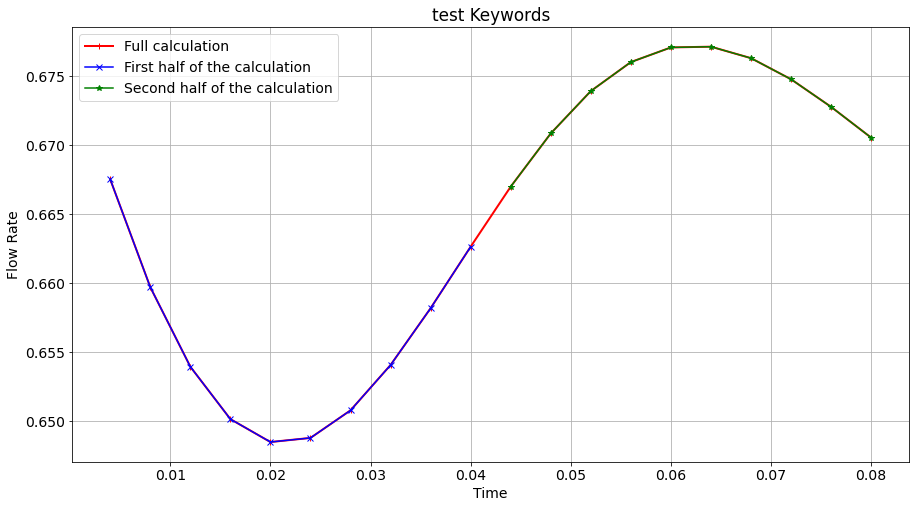

In [3]:
from trustutils.jupyter import plot

a = plot.Graph("test Keywords", size=[15,8])

x = plot.loadText("Sauvegarde_hdf5/hdf5_io_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="r-|",label="Full calculation",linewidth=2)

x = plot.loadText("Sauvegarde_hdf5/sauvegarde_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="b-x",label="First half of the calculation")

x = plot.loadText("Sauvegarde_hdf5/reprise_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="g-*",label="Second half of the calculation")

a.label("Time","Flow Rate")

a.visu()


###  Use of the keywords ’sauvegarde’ and ’resume_last_time’

Comparison of channel flow rate between a full calculation and a resumed calculation. 

The results of the resumed calculation must overlapped those of the full calculation.

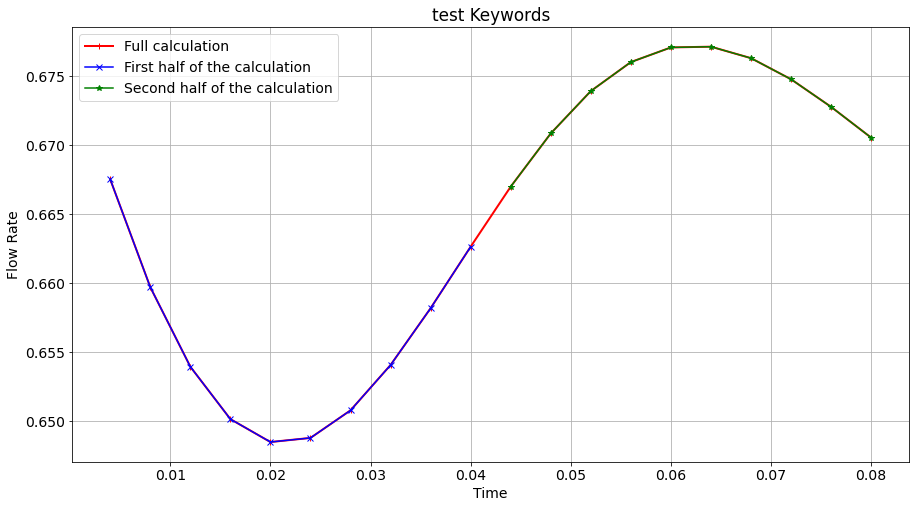

In [4]:
a = plot.Graph("test Keywords", size=[15,8])

x = plot.loadText("Sauvegarde_hdf5/hdf5_io_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="r-|",label="Full calculation",linewidth=2)

x = plot.loadText("Sauvegarde_hdf5/sauvegarde_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="b-x",label="First half of the calculation")

x = plot.loadText("Sauvegarde_hdf5/resume_last_time_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="g-*",label="Second half of the calculation")

a.label("Time","Flow Rate")

a.visu()

###  Use of the keywords ’sauvegarde_simple’ and ’reprise’

Comparison of channel flow rate between a full calculation and a resumed calculation. 

The results of the resumed calculation must overlapped those of the full calculation.

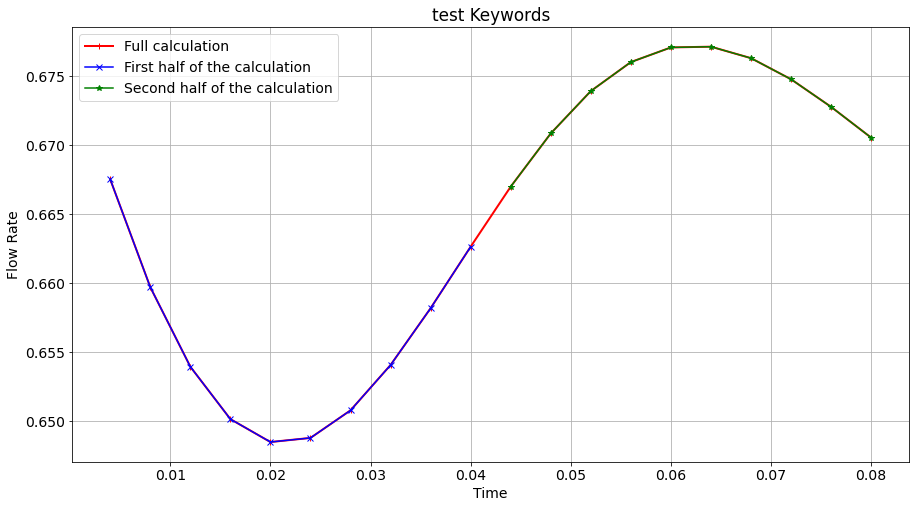

In [5]:
a = plot.Graph("test Keywords", size=[15,8])

x = plot.loadText("Sauvegarde_simple_hdf5/hdf5_io_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="r-|",label="Full calculation",linewidth=2)

x = plot.loadText("Sauvegarde_simple_hdf5/sauvegarde_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="b-x",label="First half of the calculation")

x = plot.loadText("Sauvegarde_simple_hdf5/reprise_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="g-*",label="Second half of the calculation")

a.label("Time","Flow Rate")

a.visu()

###  Use of the keywords ’sauvegarde’ and ’resume_last_time’

Comparison of channel flow rate between a full calculation and a resumed calculation. 

The results of the resumed calculation must overlapped those of the full calculation.

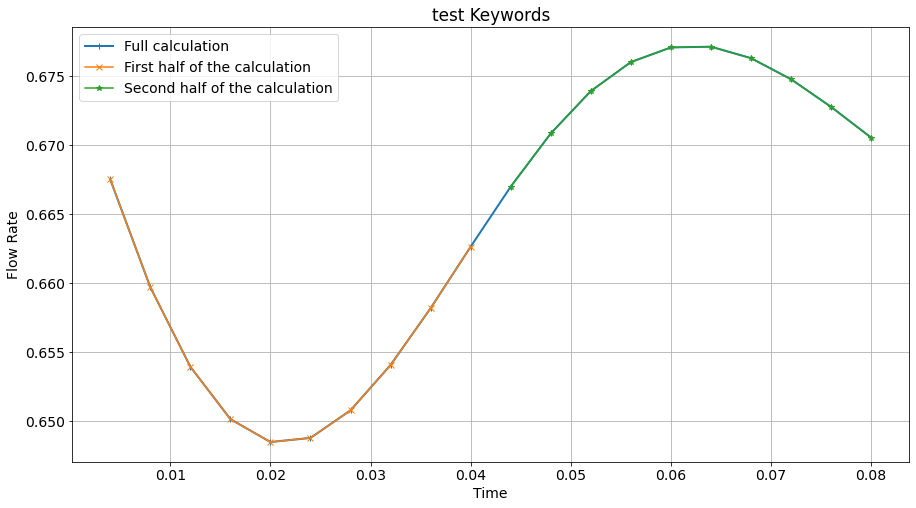

In [6]:
a = plot.Graph("test Keywords", size=[15,8])

x = plot.loadText("Sauvegarde_simple_hdf5/hdf5_io_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="-|",label="Full calculation",linewidth=2)

x = plot.loadText("Sauvegarde_simple_hdf5/sauvegarde_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="-x",label="First half of the calculation")

x = plot.loadText("Sauvegarde_simple_hdf5/resume_last_time_Channel_Flow_Rate_pb_periox")
a.add(x[0],x[1],marker="-*",label="Second half of the calculation")

a.label("Time","Flow Rate")

a.visu()

## Shared log file in HDF5 format 

In [7]:
f=open("build/Logs_hdf5/result.txt","r")
print(f.read())
f.close()

Shared journal successfully written !



## Partitionned zones in HDF5 format
The domain should be divided into 2 equal parts:  one at the bottom and one at the top.

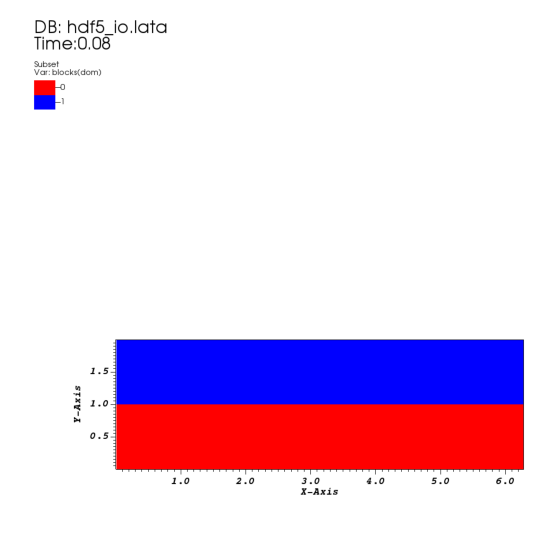

In [8]:
from trustutils import visit

Graphique=visit.Show(empty=True)
#Graphique=visit.Show("Zones_hdf5/hdf5_io.lata","Subset","blocks(dom)")
Graphique.visitCommand("OpenDatabase(\"Zones_hdf5/hdf5_io.lata\", 0)")
Graphique.visitCommand("AddPlot(\"Subset\", \"blocks(dom)\", 1, 1)")
Graphique.visitCommand("s = SubsetAttributes()")
Graphique.visitCommand("s.SetMultiColor(0, (255, 0, 0, 255))")
Graphique.visitCommand("s.SetMultiColor(1, (0, 0, 255, 255))")
Graphique.visitCommand("s.subsetNames = (\"0\", \"1\")")
Graphique.visitCommand("SetPlotOptions(s)")
Graphique.visitCommand("DrawPlots()") 
Graphique.plot()